In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing import image

In [2]:
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.3.0


In [3]:
%matplotlib inline

In [4]:
# Список классов
classes = ['scab',
 'rust',
 'coccomyces',
 'klyasterosporioz',
 'multipleDiseases',
 'healthy']  

In [5]:
img_width, img_height = 512, 512

In [6]:
with open("AvgustCare_cnn_mob.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = tf.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("AvgustCare_cnn_mob.h5")

In [7]:
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

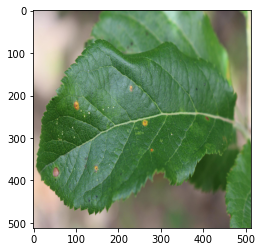

In [27]:
img = image.load_img('rust.jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()

In [28]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255

In [29]:
prediction = loaded_model.predict(x)

In [30]:
print('probabilities =', np.around(prediction,2))
print('patology is' , classes[np.argmax(prediction)])

probabilities = [[0.01 0.01 0.09 0.03 0.85 0.  ]]
patology is multipleDiseases


In [31]:
prediction.sum()

1.0

In [59]:
str(np.around(prediction,2)*100)[3:-2]

'1.  1.  9.  3. 85.  0.'